# Property Price Prediction Case Study

### Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —


- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.

### Multiple Linear Regression

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

In [2]:
# reading the housing DataFrame
df=pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
# checking for NaNs
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [5]:
# continuous variables
df_cont=df[['price','area']]
df_cont

,price,area
0,13300000,7420
1,12250000,8960
2,12250000,9960
3,12215000,7500
4,11410000,7420
...,...,...
540,1820000,3000
541,1767150,2400
542,1750000,3620
543,1750000,2910


In [6]:
# categorical variables
df_cat=df.iloc[:,2:]
df_cat

,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,4,4,4,yes,no,no,no,yes,3,no,furnished
2,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...
540,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,3,1,1,no,no,no,no,no,0,no,furnished


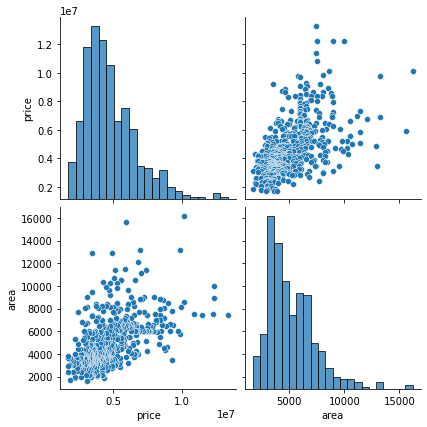

In [7]:
# Visualisation of continuous variables
sns.pairplot(df_cont,size=3)
plt.show()

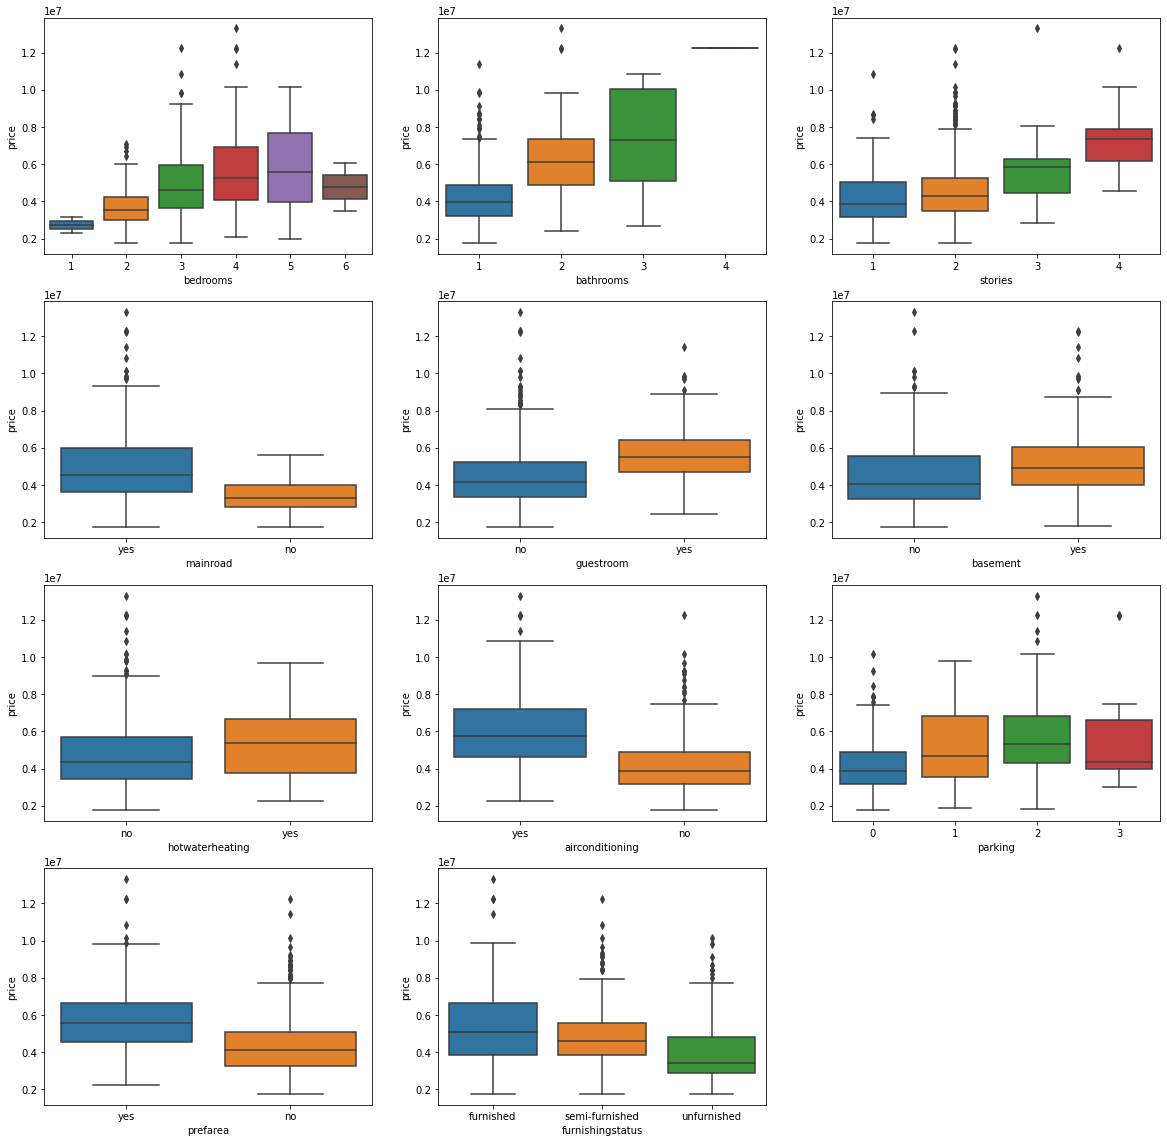

In [8]:
# Visuaising categorical variables 
plt.figure(figsize=[20,20])
plt.subplot(4,3,1)
sns.boxplot(x='bedrooms',y='price',data=df)
plt.subplot(4,3,2)
sns.boxplot(x='bathrooms',y='price',data=df)
plt.subplot(4,3,3)
sns.boxplot(x='stories',y='price',data=df)
plt.subplot(4,3,4)
sns.boxplot(x='mainroad',y='price',data=df)
plt.subplot(4,3,5)
sns.boxplot(x='guestroom',y='price',data=df)
plt.subplot(4,3,6)
sns.boxplot(x='basement',y='price',data=df)
plt.subplot(4,3,7)
sns.boxplot(x='hotwaterheating',y='price',data=df)
plt.subplot(4,3,8)
sns.boxplot(x='airconditioning',y='price',data=df)
plt.subplot(4,3,9)
sns.boxplot(x='parking',y='price',data=df)
plt.subplot(4,3,10)
sns.boxplot(x='prefarea',y='price',data=df)
plt.subplot(4,3,11)
sns.boxplot(x='furnishingstatus',y='price',data=df)

plt.show()

In [9]:
# since there is only one record with the number of bathrooms as 4
df[df.bathrooms==4]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished


In [10]:
# dropping the row
df=df[df.bathrooms!=4]

In [11]:
df_cat.columns

Index(['bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')

In [12]:
# Assigning categorical columns containing yes and no to a variable
yes_no_column=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

In [13]:
# converting it to binary
df[yes_no_column]=df[yes_no_column].replace({'yes':1,'no':0})
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [14]:
# creating Dummy variables for columns with more than 2 levels
df=pd.get_dummies(data=df,columns=['bedrooms','bathrooms','stories','parking','furnishingstatus'],drop_first=True)
df

,price,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,bedrooms_2,bedrooms_3,...,bathrooms_2,bathrooms_3,stories_2,stories_3,stories_4,parking_1,parking_2,parking_3,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,1,0,0,0,1,1,0,0,...,1,0,0,1,0,0,1,0,0,0
2,12250000,9960,1,0,1,0,0,1,0,1,...,1,0,1,0,0,0,1,0,1,0
3,12215000,7500,1,0,1,0,1,1,0,0,...,1,0,1,0,0,0,0,1,0,0
4,11410000,7420,1,1,1,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
5,10850000,7500,1,0,1,0,1,1,0,1,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
541,1767150,2400,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
543,1750000,2910,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


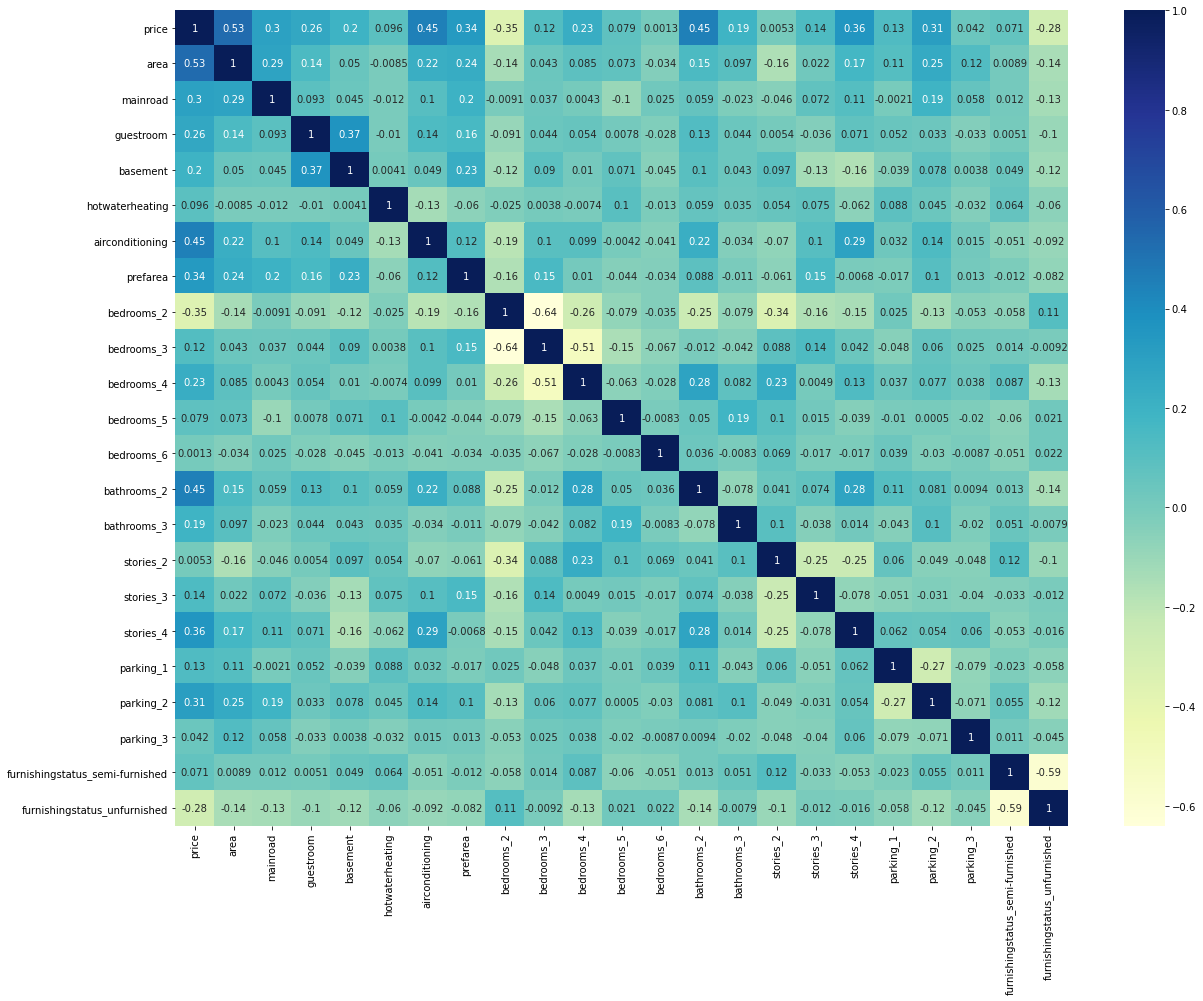

In [15]:
# Visualising the correlation for train data set
plt.figure(figsize=[20,15])
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [16]:
# splitting the df into train and test
df_train,df_test=train_test_split(df,train_size=0.7,random_state=100)

In [17]:
# size of train and test dataset
df_train.shape

(380, 23)

In [18]:
df_test.shape

(164, 23)

In [19]:
# initialising the scaler
scaler=MinMaxScaler()

In [20]:
var=['price','area']

In [21]:
# fitting the scaler to the train dataframe
df_train[var]=scaler.fit_transform(df_train[var])
df_train

,price,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,bedrooms_2,bedrooms_3,...,bathrooms_2,bathrooms_3,stories_2,stories_3,stories_4,parking_1,parking_2,parking_3,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
36,0.544848,0.418065,1,0,0,1,0,1,0,1,...,1,0,0,1,0,1,0,0,0,0
29,0.575758,0.275986,1,0,1,0,1,1,0,0,...,1,0,1,0,0,1,0,0,1,0
484,0.096970,0.099642,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
498,0.078788,0.025090,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
172,0.303030,0.483871,1,1,1,0,1,1,0,1,...,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,0.045455,0.013333,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
54,0.484848,0.311828,1,1,0,0,1,0,0,1,...,1,0,1,0,0,1,0,0,1,0
351,0.175758,0.139785,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
80,0.422424,0.311828,1,0,0,1,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0


In [22]:
df_train.describe()

,price,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,bedrooms_2,bedrooms_3,...,bathrooms_2,bathrooms_3,stories_2,stories_3,stories_4,parking_1,parking_2,parking_3,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,...,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,0.258700,0.253962,0.860526,0.171053,0.347368,0.047368,0.313158,0.226316,0.255263,0.531579,...,0.255263,0.021053,0.423684,0.081579,0.063158,0.234211,0.192105,0.023684,0.439474,0.307895
std,0.156658,0.155842,0.346897,0.377051,0.476762,0.212706,0.464389,0.418998,0.436584,0.499660,...,0.436584,0.143749,0.494793,0.274083,0.243567,0.424063,0.394475,0.152264,0.496977,0.462231
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.139785,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221818,0.212616,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.346212,0.341935,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
# seperating target and predictor variable
y_train=df_train.pop('price')
X_train=df_train
X_train

,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,bedrooms_2,bedrooms_3,bedrooms_4,...,bathrooms_2,bathrooms_3,stories_2,stories_3,stories_4,parking_1,parking_2,parking_3,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
36,0.418065,1,0,0,1,0,1,0,1,0,...,1,0,0,1,0,1,0,0,0,0
29,0.275986,1,0,1,0,1,1,0,0,1,...,1,0,1,0,0,1,0,0,1,0
484,0.099642,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
498,0.025090,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
172,0.483871,1,1,1,0,1,1,0,1,0,...,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,0.013333,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
54,0.311828,1,1,0,0,1,0,0,1,0,...,1,0,1,0,0,1,0,0,1,0
351,0.139785,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
80,0.311828,1,0,0,1,0,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0


In [24]:
# initialising the model
lr=LinearRegression()

In [25]:
# fitting the lr model using Sklearn
lr=lr.fit(X_train,y_train)

In [26]:
# initialising the RFE
rfe=RFE(lr,15)

In [27]:
# fitting the RFE to train set
rfe=rfe.fit(X_train,y_train)

In [28]:
# checking for the eliminated columns
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('mainroad', True, 1),
 ('guestroom', False, 4),
 ('basement', True, 1),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('prefarea', True, 1),
 ('bedrooms_2', False, 7),
 ('bedrooms_3', False, 3),
 ('bedrooms_4', True, 1),
 ('bedrooms_5', False, 2),
 ('bedrooms_6', True, 1),
 ('bathrooms_2', True, 1),
 ('bathrooms_3', True, 1),
 ('stories_2', False, 6),
 ('stories_3', True, 1),
 ('stories_4', True, 1),
 ('parking_1', True, 1),
 ('parking_2', True, 1),
 ('parking_3', False, 5),
 ('furnishingstatus_semi-furnished', False, 8),
 ('furnishingstatus_unfurnished', True, 1)]

In [29]:
X_train_rfe=X_train[X_train.columns[rfe.support_]]
X_train_rfe

,area,mainroad,basement,hotwaterheating,airconditioning,prefarea,bedrooms_4,bedrooms_6,bathrooms_2,bathrooms_3,stories_3,stories_4,parking_1,parking_2,furnishingstatus_unfurnished
36,0.418065,1,0,1,0,1,0,0,1,0,1,0,1,0,0
29,0.275986,1,1,0,1,1,1,0,1,0,0,0,1,0,0
484,0.099642,0,0,0,0,0,0,0,0,0,0,0,0,0,1
498,0.025090,1,0,0,0,0,0,0,0,0,0,0,0,0,0
172,0.483871,1,1,0,1,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,0.013333,0,1,0,0,0,0,0,0,0,0,0,0,0,0
54,0.311828,1,0,0,1,0,0,0,1,0,0,0,1,0,0
351,0.139785,1,0,0,0,0,0,0,0,0,0,0,0,0,0
80,0.311828,1,0,1,0,1,0,0,0,0,0,0,1,0,0


In [30]:
# Adding constants
X_train_sm=sm.add_constant(X_train_rfe)
X_train_sm

,const,area,mainroad,basement,hotwaterheating,airconditioning,prefarea,bedrooms_4,bedrooms_6,bathrooms_2,bathrooms_3,stories_3,stories_4,parking_1,parking_2,furnishingstatus_unfurnished
36,1.0,0.418065,1,0,1,0,1,0,0,1,0,1,0,1,0,0
29,1.0,0.275986,1,1,0,1,1,1,0,1,0,0,0,1,0,0
484,1.0,0.099642,0,0,0,0,0,0,0,0,0,0,0,0,0,1
498,1.0,0.025090,1,0,0,0,0,0,0,0,0,0,0,0,0,0
172,1.0,0.483871,1,1,0,1,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,1.0,0.013333,0,1,0,0,0,0,0,0,0,0,0,0,0,0
54,1.0,0.311828,1,0,0,1,0,0,0,1,0,0,0,1,0,0
351,1.0,0.139785,1,0,0,0,0,0,0,0,0,0,0,0,0,0
80,1.0,0.311828,1,0,1,0,1,0,0,0,0,0,0,1,0,0


In [31]:
# fitting the lr
lr=sm.OLS(y_train,X_train_sm).fit()

In [32]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     47.54
Date:                Sat, 05 Jun 2021   Prob (F-statistic):           3.69e-76
Time:                        01:01:07   Log-Likelihood:                 371.84
No. Observations:                 380   AIC:                            -711.7
Df Residuals:                     364   BIC:                            -648.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0550      0.016      3.510      0.001       0.024       0.086
area                             0.2651      0.035      7.566      0.000       0.196       0.334
mainroad                         0.0395      0.015      2.649      0.008       0.010       0.069
basement                         0.0378      0.011      3.402      0.001       0.016       0.060
hotwaterheating                  0.0822      0.023      3.515      0.000       0.036       0.128
airconditioning                  0.0767      0.011      6.898      0.000       0.055       0.099
prefarea                         0.0610      0.012      4.890      0.000       0.036       0.086
bedrooms_4                       0.0262      0.013      2.000      0.046       0.000       0.052
bedrooms_6                       0.0237      0.094      0.252      0.801      -0.161       0.209
bathrooms_2                      0.0814      0.013      6.481      0.000       0.057       0.106
bathrooms_3                      0.1879      0.035      5.440      0.000       0.120       0.256
stories_3                        0.0689      0.018      3.728      0.000       0.033       0.105
stories_4                        0.1217      0.022      5.535      0.000       0.078       0.165
parking_1                        0.0345      0.012      2.766      0.006       0.010       0.059
parking_2                        0.0428      0.014      3.121      0.002       0.016       0.070
furnishingstatus_unfurnished    -0.0382      0.011     -3.528      0.000      -0.059      -0.017
==============================================================================
Omnibus:                       86.131   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.126
Skew:                           1.082   Prob(JB):                     7.90e-50
Kurtosis:                       6.099   Cond. No.                         31.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
vif=pd.DataFrame()
vif['columns']=X_train_rfe.columns
vif['vif']=[variance_inflation_factor(X_train_rfe.values,i)for i in range(X_train_rfe.shape[1])]
vif=vif.round(2)
vif=vif.sort_values(by='vif',ascending=False)
vif

,columns,vif
1,mainroad,4.63
0,area,4.41
2,basement,1.84
8,bathrooms_2,1.76
4,airconditioning,1.69
13,parking_2,1.59
12,parking_1,1.57
5,prefarea,1.54
6,bedrooms_4,1.38
11,stories_4,1.33


**Now the p value for `bedrooms_6` variables are significant , droping the variable first.**

In [34]:
X_train_rfe=X_train_rfe.drop('bedrooms_6',axis=1)
X_train_sm=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train,X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     51.06
Date:                Sat, 05 Jun 2021   Prob (F-statistic):           5.23e-77
Time:                        01:01:07   Log-Likelihood:                 371.80
No. Observations:                 380   AIC:                            -713.6
Df Residuals:                     365   BIC:                            -654.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0550      0.016      3.510      0.001       0.024       0.086
area                             0.2647      0.035      7.572      0.000       0.196       0.333
mainroad                         0.0396      0.015      2.666      0.008       0.010       0.069
basement                         0.0377      0.011      3.400      0.001       0.016       0.060
hotwaterheating                  0.0820      0.023      3.514      0.000       0.036       0.128
airconditioning                  0.0767      0.011      6.903      0.000       0.055       0.099
prefarea                         0.0610      0.012      4.895      0.000       0.036       0.086
bedrooms_4                       0.0262      0.013      2.001      0.046       0.000       0.052
bathrooms_2                      0.0814      0.013      6.487      0.000       0.057       0.106
bathrooms_3                      0.1879      0.034      5.447      0.000       0.120       0.256
stories_3                        0.0688      0.018      3.731      0.000       0.033       0.105
stories_4                        0.1216      0.022      5.538      0.000       0.078       0.165
parking_1                        0.0348      0.012      2.816      0.005       0.011       0.059
parking_2                        0.0429      0.014      3.134      0.002       0.016       0.070
furnishingstatus_unfurnished    -0.0380      0.011     -3.523      0.000      -0.059      -0.017
==============================================================================
Omnibus:                       86.034   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.965
Skew:                           1.080   Prob(JB):                     8.56e-50
Kurtosis:                       6.099   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
vif=pd.DataFrame()
vif['columns']=X_train_rfe.columns
vif['vif']=[variance_inflation_factor(X_train_rfe.values,i)for i in range(X_train_rfe.shape[1])]
vif=vif.round(2)
vif=vif.sort_values(by='vif',ascending=False)
vif

,columns,vif
1,mainroad,4.63
0,area,4.40
2,basement,1.84
7,bathrooms_2,1.76
4,airconditioning,1.69
12,parking_2,1.59
11,parking_1,1.55
5,prefarea,1.54
6,bedrooms_4,1.38
10,stories_4,1.33


**Now the p values for all the variables are significant and even vif is better i.e, less than 5, hence the Linear Regression Model is finalised.**

## Resudial Analysis

In [36]:
# getting predicted values from model.
y_train_pred=lr.predict(X_train_sm)

In [37]:
# r-squared value.
r2_score(y_train,y_train_pred)

0.6620050924320675

In [38]:
# Resudial values
res=y_train-y_train_pred

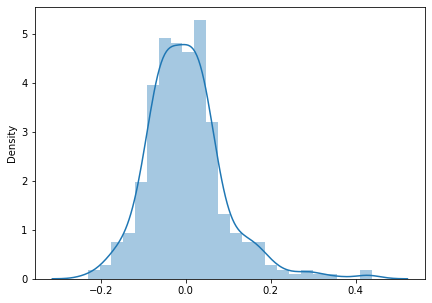

In [39]:
# plotting distrubtion plot for resudials
plt.figure(figsize=[7,5])
sns.distplot(res)
plt.show()

**As we can see the curve looks like normally distrubuted with mean zero. Hence our model is inline with the assumption that the error follows the normal distrubution.**

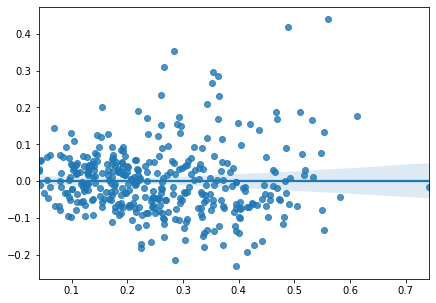

In [40]:
# checking for any variance pattern among resudials.
plt.figure(figsize=[7,5])
sns.regplot(y_train_pred,res)
plt.show()

**Since we can see any pattern among the resudials, our lr model is inline with the assumptions that errors are independent to each other.**

Hence our model holds good for the assumptions of simple linear regression were:
1. Linear relationship between X and Y.
2. Error terms are normally distributed.
3. Error terms are independent of each other.
4. Error terms have constant variance (homoscedasticity).

## Model Evaluation

**Now we validate our model using test dataframe.**

In [41]:
# test DataFrame
df_test

,price,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,bedrooms_2,bedrooms_3,...,bathrooms_2,bathrooms_3,stories_2,stories_3,stories_4,parking_1,parking_2,parking_3,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
26,8463000,6000,1,1,1,0,1,1,0,1,...,1,0,0,0,1,0,0,0,1,0
55,7350000,6000,1,0,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,1
242,4550000,3640,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
492,2800000,2650,1,0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
245,4550000,5360,1,0,0,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,7490000,6600,1,0,0,0,1,1,0,1,...,0,0,0,0,1,0,0,1,0,0
51,7420000,6325,1,0,0,0,1,0,0,1,...,0,0,0,0,1,1,0,0,0,1
357,3773000,6930,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
20,8750000,4320,1,0,1,1,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0


In [42]:
# transforming the test data.
df_test[var]=scaler.transform(df_test[var])
df_test

,price,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,bedrooms_2,bedrooms_3,...,bathrooms_2,bathrooms_3,stories_2,stories_3,stories_4,parking_1,parking_2,parking_3,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
26,0.581212,0.311828,1,1,1,0,1,1,0,1,...,1,0,0,0,1,0,0,0,1,0
55,0.484848,0.311828,1,0,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,1
242,0.242424,0.142652,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
492,0.090909,0.071685,1,0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
245,0.242424,0.265950,1,0,0,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,0.496970,0.354839,1,0,0,0,1,1,0,1,...,0,0,0,0,1,0,0,1,0,0
51,0.490909,0.335125,1,0,0,0,1,0,0,1,...,0,0,0,0,1,1,0,0,0,1
357,0.175152,0.378495,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
20,0.606061,0.191398,1,0,1,1,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0


In [43]:
df_test.describe()

,price,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,bedrooms_2,bedrooms_3,...,bathrooms_2,bathrooms_3,stories_2,stories_3,stories_4,parking_1,parking_2,parking_3,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,...,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.263004,0.242255,0.853659,0.195122,0.359756,0.042683,0.317073,0.256098,0.237805,0.597561,...,0.219512,0.012195,0.469512,0.048780,0.097561,0.225610,0.213415,0.012195,0.365854,0.371951
std,0.166940,0.154087,0.354531,0.397508,0.481399,0.202760,0.466761,0.437813,0.427043,0.491891,...,0.415184,0.110092,0.500598,0.216069,0.297629,0.419263,0.410973,0.110092,0.483144,0.484806
min,0.006061,0.018280,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.139394,0.137097,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.233030,0.204301,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.339773,0.320968,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,0.909091,1.043011,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
y_test=df_test.pop('price')

In [45]:
X_test=df_test

In [46]:
X_test_sm=sm.add_constant(X_test)
X_test_sm

,const,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,bedrooms_2,bedrooms_3,...,bathrooms_2,bathrooms_3,stories_2,stories_3,stories_4,parking_1,parking_2,parking_3,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
26,1.0,0.311828,1,1,1,0,1,1,0,1,...,1,0,0,0,1,0,0,0,1,0
55,1.0,0.311828,1,0,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,1
242,1.0,0.142652,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
492,1.0,0.071685,1,0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
245,1.0,0.265950,1,0,0,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,1.0,0.354839,1,0,0,0,1,1,0,1,...,0,0,0,0,1,0,0,1,0,0
51,1.0,0.335125,1,0,0,0,1,0,0,1,...,0,0,0,0,1,1,0,0,0,1
357,1.0,0.378495,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
20,1.0,0.191398,1,0,1,1,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0


In [47]:
# assigning required columns from the train data set.
X_test_sm=X_test_sm[X_train_sm.columns]
X_test_sm

,const,area,mainroad,basement,hotwaterheating,airconditioning,prefarea,bedrooms_4,bathrooms_2,bathrooms_3,stories_3,stories_4,parking_1,parking_2,furnishingstatus_unfurnished
26,1.0,0.311828,1,1,0,1,1,0,1,0,0,1,0,0,0
55,1.0,0.311828,1,0,0,1,0,0,0,0,0,0,1,0,1
242,1.0,0.142652,1,0,0,1,0,0,0,0,0,0,0,0,0
492,1.0,0.071685,1,1,0,0,0,0,0,0,0,0,1,0,1
245,1.0,0.265950,1,0,0,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,1.0,0.354839,1,0,0,1,1,0,0,0,0,1,0,0,0
51,1.0,0.335125,1,0,0,1,0,0,0,0,0,1,1,0,1
357,1.0,0.378495,0,0,0,0,0,1,0,0,0,0,1,0,0
20,1.0,0.191398,1,1,1,0,0,0,0,0,0,0,0,1,0


## Results and Conclusions.

In [48]:
# looking for the prediction values
y_test_pred=lr.predict(X_test_sm)

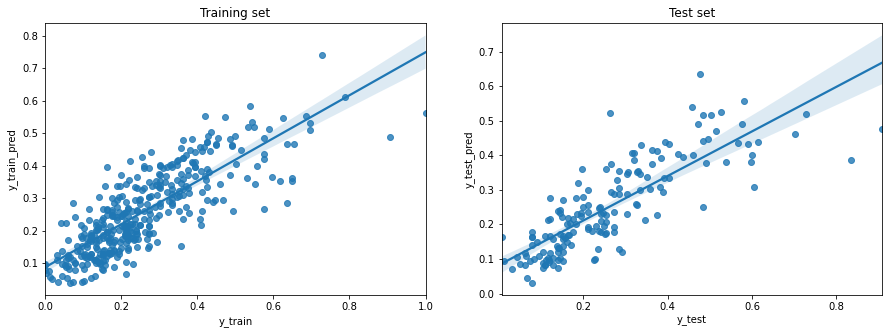

In [49]:
# regression model with predicted values
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.regplot(y_train,y_train_pred)
plt.title('Training set')
plt.xlabel('y_train')
plt.ylabel('y_train_pred')
plt.subplot(1,2,2)
sns.regplot(y_test,y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.title('Test set')
plt.show()

In [50]:
# r-squared value
r2_score(y_test,y_test_pred)

0.6628062969940968

In [51]:
r2_score(y_train,y_train_pred)

0.6620050924320675

**Thus, for the model with 14 variables, the r-squared on training and test data is about 66.2% and 66.28% respectively. The adjusted r-squared on the train set is about is about 64.9%.**

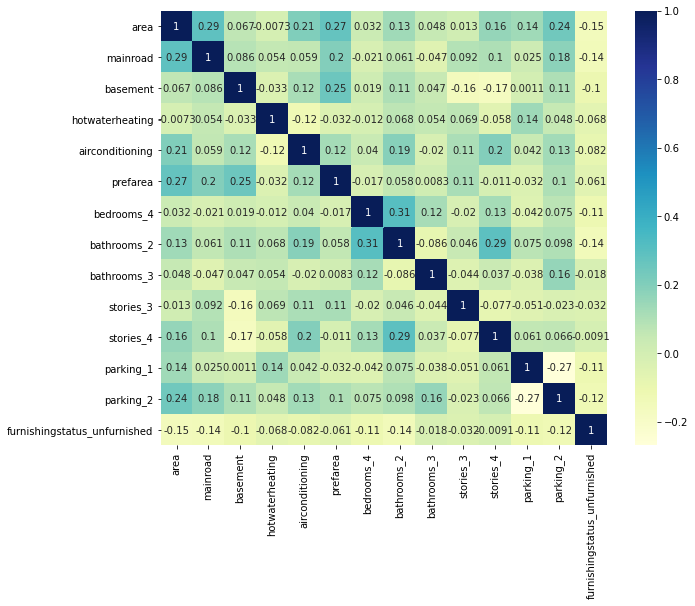

In [52]:
# plotting correlation
plt.figure(figsize=[10,8])
sns.heatmap(X_train_rfe.corr(),cmap="YlGnBu", annot=True)
plt.show()

**This is the simplest model that we could build. The final predictors seem to have fairly low correlations.**

**Thus, the final model consists of the 14 variables mentioned above.One can go ahead with this model and use it for predicting the prices in delhi.**